In [1]:
%pylab --no-import-all notebook
import sys 
sys.path.append("../modules")

Populating the interactive namespace from numpy and matplotlib


In [19]:
import Classification as CL
import datasets as d
import pandas as pd
import copy
from itertools import chain

In [3]:
import os 
path = os.getcwd()
path = path.replace(path.split('/')[-1],'')

In [4]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, mutual_info_classif

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel 

In [5]:
data = d.load_dataset(name="first_dataset")

In [6]:
feature_matrix = CL.make_matrix(data.data, 
                                combin="all", 
                                okna=[[4, 6], [8, 10], [12, 14, 16], range(5,17)])

In [9]:
feature_matrix

array([[  9.58919217e-01,   1.24620899e-02,   3.75968118e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.24179763e-01,   6.34132892e-04,  -1.12253338e-02, ...,
          3.01707418e-04,   3.01707418e-04,   3.01707418e-04],
       [  1.09787703e+00,  -2.02095396e-02,  -2.76605115e-02, ...,
          5.63187180e-03,   5.63187180e-03,   5.63187180e-03],
       ..., 
       [  2.02497770e+00,   6.20422683e-02,   4.46459412e-03, ...,
          5.89604650e-03,   6.76929626e-03,   6.35236185e-03],
       [  2.15449169e+00,   6.14365481e-02,  -9.37471797e-03, ...,
          8.58555210e-03,   8.73470737e-03,   9.14078824e-03],
       [  2.33422539e+00,   4.93056244e-02,  -1.31313274e-02, ...,
          1.67460881e-02,   1.72486109e-02,   1.72127901e-02]])

In [8]:
LABELS = d.merge_labels(data.labels)
LABELS

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [10]:
np.shape(feature_matrix)

(32816, 29)

In [22]:
col = ["h-alpha", "1.d sg", "2.d sg"]
col = col + [f"MM {j}" for j in chain([4, 6], [8, 10], [12, 14, 16])]
col = col + [f"EMM {j}" for j in chain([4, 6], [8, 10], [12, 14, 16])]
col = col + [f"MVar {j}" for j in range(5,17)]
print(col)

['h-alpha', '1.d sg', '2.d sg', 'MM 4', 'MM 6', 'MM 8', 'MM 10', 'MM 12', 'MM 14', 'MM 16', 'EMM 4', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 5', 'MVar 6', 'MVar 7', 'MVar 8', 'MVar 9', 'MVar 10', 'MVar 11', 'MVar 12', 'MVar 13', 'MVar 14', 'MVar 15', 'MVar 16']


In [26]:
feature_matrix = pd.DataFrame(feature_matrix, columns=col)
feature_matrix.head()

,h-alpha,1.d sg,2.d sg,MM 4,MM 6,MM 8,MM 10,MM 12,MM 14,MM 16,...,MVar 7,MVar 8,MVar 9,MVar 10,MVar 11,MVar 12,MVar 13,MVar 14,MVar 15,MVar 16
0,0.958919,0.012462,0.003760,0.958919,0.958919,0.958919,0.958919,0.958919,0.958919,0.958919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.924180,0.000634,-0.011225,0.941549,0.941549,0.941549,0.941549,0.941549,0.941549,0.941549,...,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302,0.000302
2,1.097877,-0.020210,-0.027661,0.993659,0.993659,0.993659,0.993659,0.993659,0.993659,0.993659,...,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632,0.005632
3,1.049904,-0.037340,-0.030494,1.007720,1.007720,1.007720,1.007720,1.007720,1.007720,1.007720,...,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817,0.004817
4,1.016818,-0.028067,-0.002289,1.022195,1.009540,1.009540,1.009540,1.009540,1.009540,1.009540,...,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867,0.003867


<IPython.core.display.Javascript object>


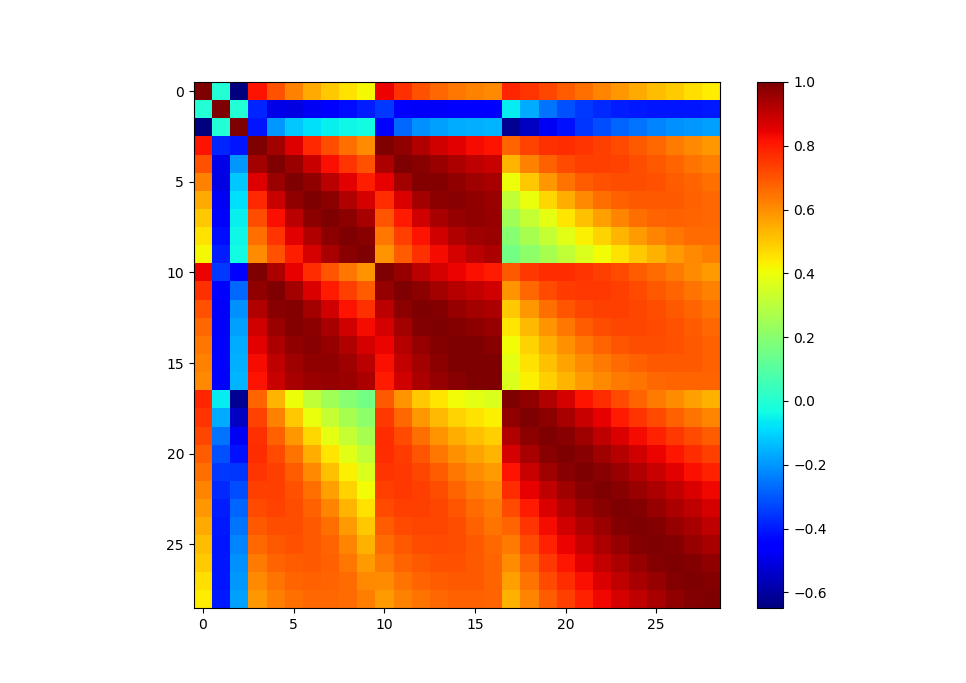

In [65]:
cor = plt.imshow(feature_matrix.corr(),cmap=plt.cm.jet) #plt.cm.hot
plt.colorbar(cor)

# Select K Best - f_classif

In [37]:
Kbest = SelectKBest(f_classif, k=20)
tmp = Kbest.fit_transform(feature_matrix, LABELS)

In [38]:
Kbest.scores_

array([  5298.28607837,     74.65825021,    250.80210314,   7465.80784486,
         9142.49037924,  10879.41686578,  12607.39800182,  14194.79193616,
        15512.95581153,  16476.60374002,   7474.66118353,   9156.35451839,
        10899.55713982,  12646.25509897,  14294.84687795,  15742.9064456 ,
        16914.06090445,   2276.94586362,   2903.75422096,   3575.83778751,
         4297.36161345,   5069.93560984,   5894.41877482,   6763.81664456,
         7659.93546709,   8594.72644108,   9564.9521832 ,  10557.49232289,
        11537.30165295])

<IPython.core.display.Javascript object>


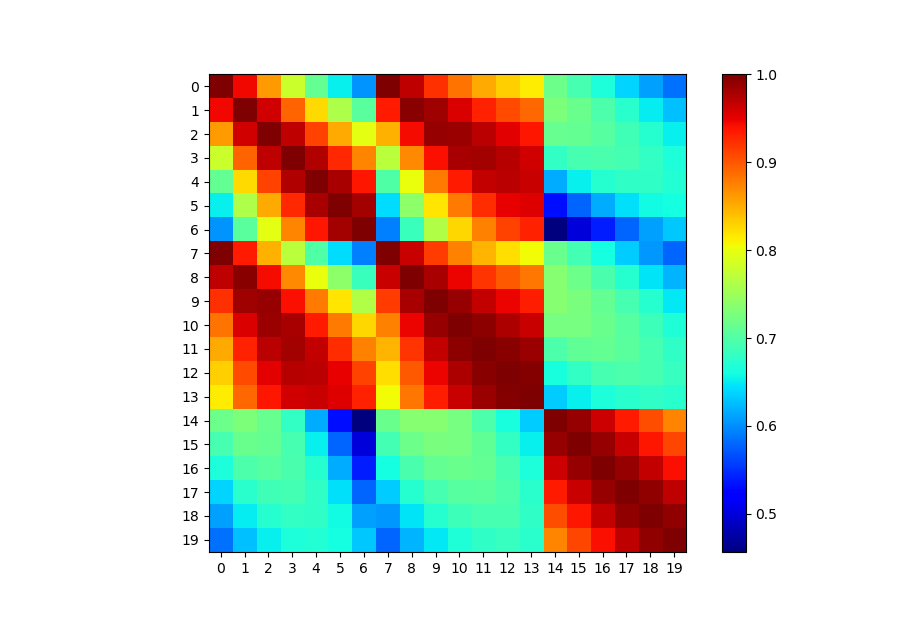

In [76]:
plt.figure("Korelační matice po KBest (f_classif)")
cor_after_Kbest = plt.imshow(pd.DataFrame(tmp).corr(),cmap=plt.cm.jet)#plt.cm.hot
plt.yticks(np.arange(20))
plt.xticks(np.arange(20))

plt.colorbar(cor_after_Kbest)
print()

In [115]:
kbest_sup = Kbest.get_support(True)
kbest_sup

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 23, 24, 25,
       26, 27, 28])

In [122]:
def support(columns, supp):
    col_supp = []
    for i, feat in enumerate(columns):
        if i in supp:
            col_supp.append(feat)
    return col_supp

In [123]:
col_after_Kbest = support(col, kbest_sup)

In [124]:
print(col_after_Kbest)

['MM 4', 'MM 6', 'MM 8', 'MM 10', 'MM 12', 'MM 14', 'MM 16', 'EMM 4', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 11', 'MVar 12', 'MVar 13', 'MVar 14', 'MVar 15', 'MVar 16']


## matual_info_classif

In [119]:
Kbest_MI = SelectKBest(mutual_info_classif, k=20)
tmp1 = Kbest_MI.fit_transform(feature_matrix, LABELS)
Kbest_MI.scores_

array([ 0.41659724,  0.31575176,  0.22818145,  0.43666415,  0.44589742,
        0.44779568,  0.44766682,  0.44397314,  0.4317894 ,  0.41761609,
        0.42582975,  0.44122056,  0.45096262,  0.45695357,  0.45351111,
        0.44944091,  0.44501983,  0.30731356,  0.33864599,  0.36849025,
        0.39575953,  0.41830881,  0.43729697,  0.45420572,  0.46648457,
        0.47625181,  0.48691708,  0.49647842,  0.49983754])

<IPython.core.display.Javascript object>


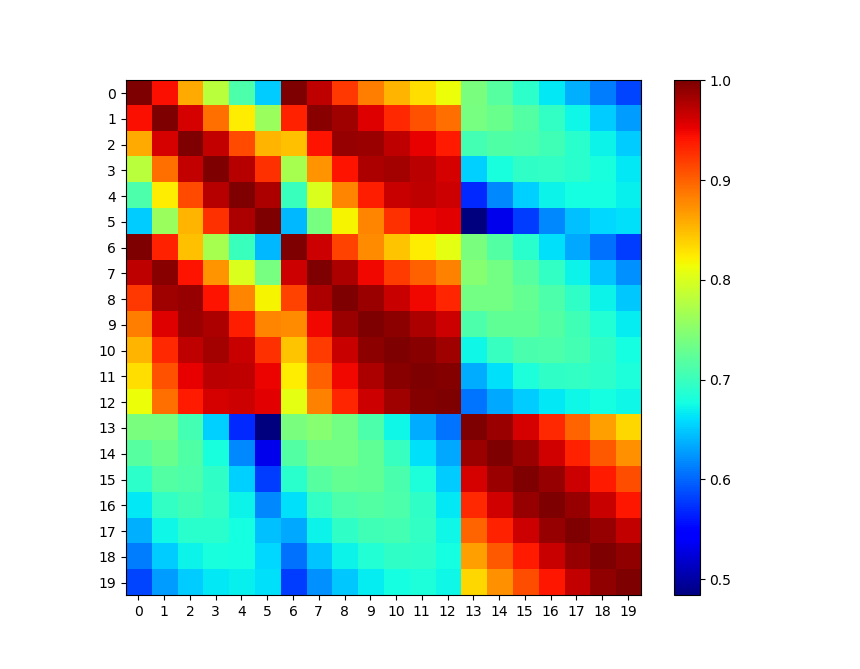

In [273]:
plt.figure("Korelační matice po KBest (matual_info)")
cor_after_Kbest_MI = plt.imshow(pd.DataFrame(tmp1).corr(),cmap=plt.cm.jet)#plt.cm.hot
plt.yticks(np.arange(20))
plt.xticks(np.arange(20))

plt.colorbar(cor_after_Kbest_MI)


In [128]:
col_after_kbest_mi= support(col, Kbest_MI.get_support(True))
print(col_after_kbest_mi)

['MM 4', 'MM 6', 'MM 8', 'MM 10', 'MM 12', 'MM 14', 'EMM 4', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 10', 'MVar 11', 'MVar 12', 'MVar 13', 'MVar 14', 'MVar 15', 'MVar 16']


In [131]:
col_after_Kbest

['MM 4',
 'MM 6',
 'MM 8',
 'MM 10',
 'MM 12',
 'MM 14',
 'MM 16',
 'EMM 4',
 'EMM 6',
 'EMM 8',
 'EMM 10',
 'EMM 12',
 'EMM 14',
 'EMM 16',
 'MVar 11',
 'MVar 12',
 'MVar 13',
 'MVar 14',
 'MVar 15',
 'MVar 16']

In [132]:
col_after_kbest_mi

['MM 4',
 'MM 6',
 'MM 8',
 'MM 10',
 'MM 12',
 'MM 14',
 'EMM 4',
 'EMM 6',
 'EMM 8',
 'EMM 10',
 'EMM 12',
 'EMM 14',
 'EMM 16',
 'MVar 10',
 'MVar 11',
 'MVar 12',
 'MVar 13',
 'MVar 14',
 'MVar 15',
 'MVar 16']

### Kbest(f_classif) se od Kbest(mutal_info) liší jen o jeden příznak (MM16<->MVar10)

In [192]:
iterables = [['Důležitost podle metody'], ['Kbest (f_classif)']]

multiindex = pd.MultiIndex.from_product(iterables, names=['', 'Feature'])


In [204]:
FeatSel = pd.DataFrame(np.int_(Kbest.scores_),index=col, columns=multiindex)
FeatSel[('Důležitost podle metody','Kbest (mutual_info)')] = np.round_(Kbest_MI.scores_, decimals=3)

In [214]:
FeatSel
#FeatSel.sort_values([('Důležitost podle metody','Kbest (f_classif)')], ascending=False)

Důležitost podle metody                    
Feature       Kbest (f_classif) Kbest (mutual_info)
h-alpha                    5298               0.417
1.d sg                       74               0.316
2.d sg                      250               0.228
MM 4                       7465               0.437
MM 6                       9142               0.446
MM 8                      10879               0.448
MM 10                     12607               0.448
MM 12                     14194               0.444
MM 14                     15512               0.432
MM 16                     16476               0.418
EMM 4                      7474               0.426
EMM 6                      9156               0.441
EMM 8                     10899               0.451
EMM 10                    12646               0.457
EMM 12                    14294               0.454
EMM 14                    15742               0.449
EMM 16                    16914               0.445
MVar 5                     2276               0.307
MVar 6                     2903               0.339
MVar 7                     3575               0.368
MVar 8                     4297               0.396
MVar 9                     5069               0.418
MVar 10                    5894               0.437
MVar 11                    6763               0.454
MVar 12                    7659               0.466
MVar 13                    8594               0.476
MVar 14                    9564               0.487
MVar 15                   10557               0.496
MVar 16                   11537               0.500

# Select from Model

In [220]:
clf = ExtraTreesClassifier(n_estimators=200)
clf.fit(feature_matrix[:-3000], LABELS[:-3000])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [221]:
clf.score(feature_matrix[-3000:], LABELS[-3000:])

0.8793333333333333

In [224]:
model = SelectFromModel(clf, prefit=True)

In [229]:
model.get_support(True)

array([ 1,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 25, 26, 27, 28])

In [239]:
temp = feature_matrix.loc[:,"h-alpha":"MVar 10"]

In [248]:
model2 = SelectFromModel(ExtraTreesClassifier(n_estimators=200).fit(feature_matrix, LABELS), prefit=True)

In [249]:
model2.get_support(True)

array([ 1,  6,  8,  9, 11, 12, 13, 14, 15, 16, 26, 27, 28])

In [253]:
data.shape

(10, 3, [3596, 3188, 3387, 3319, 3667, 3646, 3140, 3119, 2754, 3000], 32816)

In [254]:
X = model2.transform(feature_matrix)

In [255]:
ada = AdaBoostClassifier(n_estimators = 1000, learning_rate=.1).fit(X[:-3000], LABELS[:-3000])
ada.score(X[-3000:], LABELS[-3000:])

0.91133333333333333

In [270]:
print(support(col,model2.get_support(True)))

['1.d sg', 'MM 10', 'MM 14', 'MM 16', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 14', 'MVar 15', 'MVar 16']


In [263]:
list(zip(clf.feature_importances_, col))

[(0.023525265772774438, 'h-alpha'),
 (0.062395966736991895, '1.d sg'),
 (0.021439497199656606, '2.d sg'),
 (0.022651328346209258, 'MM 4'),
 (0.028236331772295401, 'MM 6'),
 (0.036365613493767233, 'MM 8'),
 (0.03679489723467521, 'MM 10'),
 (0.040495517961533493, 'MM 12'),
 (0.041849404256928534, 'MM 14'),
 (0.060613003749035908, 'MM 16'),
 (0.029290983495658042, 'EMM 4'),
 (0.04908881803071407, 'EMM 6'),
 (0.030201282565488614, 'EMM 8'),
 (0.05018752480668958, 'EMM 10'),
 (0.040033335763752412, 'EMM 12'),
 (0.034869548523237294, 'EMM 14'),
 (0.038802059767250957, 'EMM 16'),
 (0.012859562909726022, 'MVar 5'),
 (0.015334360506672268, 'MVar 6'),
 (0.017254456634345647, 'MVar 7'),
 (0.021730584567338652, 'MVar 8'),
 (0.023303425917974567, 'MVar 9'),
 (0.021947853381236983, 'MVar 10'),
 (0.029240770375275192, 'MVar 11'),
 (0.031182927501108511, 'MVar 12'),
 (0.041049840931197616, 'MVar 13'),
 (0.038758936805106899, 'MVar 14'),
 (0.047825375439437927, 'MVar 15'),
 (0.052671525553920857, 'MVar

In [264]:
FeatSel[('Důležitost podle metody','ExtraTrees')] = np.round_(clf.feature_importances_, decimals=3)

In [266]:
FeatSel.sort_values([('Důležitost podle metody','ExtraTrees')], ascending=False)

Důležitost podle metody                               
Feature       Kbest (f_classif) Kbest (mutual_info) ExtraTrees
1.d sg                       74               0.316      0.062
MM 16                     16476               0.418      0.061
MVar 16                   11537               0.500      0.053
EMM 10                    12646               0.457      0.050
EMM 6                      9156               0.441      0.049
MVar 15                   10557               0.496      0.048
MM 14                     15512               0.432      0.042
MVar 13                    8594               0.476      0.041
EMM 12                    14294               0.454      0.040
MM 12                     14194               0.444      0.040
EMM 16                    16914               0.445      0.039
MVar 14                    9564               0.487      0.039
MM 10                     12607               0.448      0.037
MM 8                      10879               0.448      0.036
EMM 14                    15742               0.449      0.035
MVar 12                    7659               0.466      0.031
EMM 8                     10899               0.451      0.030
MVar 11                    6763               0.454      0.029
EMM 4                      7474               0.426      0.029
MM 6                       9142               0.446      0.028
h-alpha                    5298               0.417      0.024
MVar 9                     5069               0.418      0.023
MM 4                       7465               0.437      0.023
MVar 10                    5894               0.437      0.022
MVar 8                     4297               0.396      0.022
2.d sg                      250               0.228      0.021
MVar 7                     3575               0.368      0.017
MVar 6                     2903               0.339      0.015
MVar 5                     2276               0.307      0.013

<IPython.core.display.Javascript object>


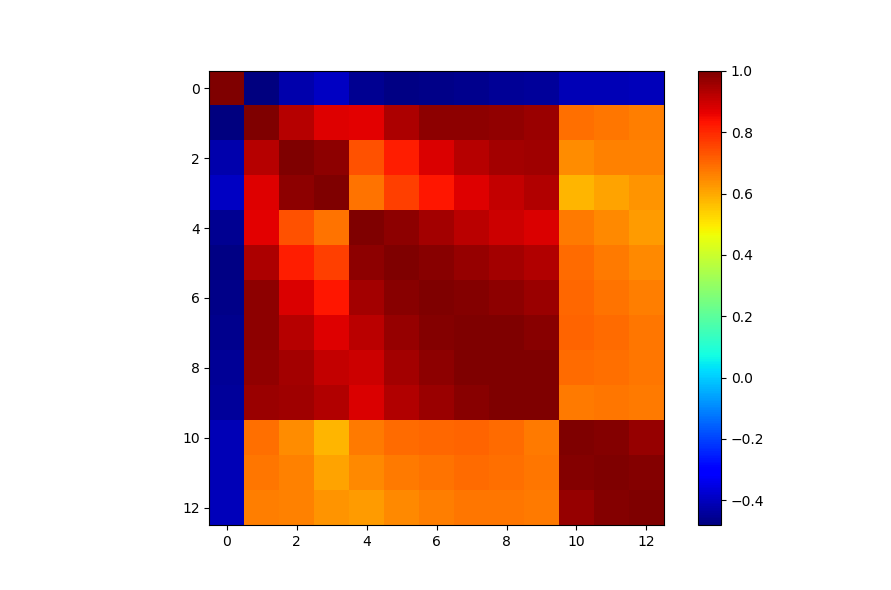

In [281]:
plt.figure("po extra Trees")
corelMat=plt.imshow(pd.DataFrame(X).corr(), cmap=plt.cm.jet)
plt.colorbar(corelMat)

# průnik

In [290]:
TRAIN, TEST = d.PrepareCrossFold(data.data)

In [318]:
SUPP = []
for x,y in enumerate(TRAIN):
    fit_train = CL.make_matrix(y, combin="all", okna=[[4, 6], [8, 10], [12, 14, 16], range(5,17)])
    fit_target = d.merge_labels(d.get_layer(y,2))
    mod = SelectFromModel(ExtraTreesClassifier(n_estimators=200).fit(fit_train, fit_target), prefit=True)
    SUPP.append(mod.get_support(True))
SUPP
    

[array([ 1,  6,  7,  8,  9, 12, 13, 14, 15, 16, 24, 26, 27, 28]),
 array([ 1,  3,  5,  7,  8,  9, 12, 13, 15, 16, 25, 26, 27, 28]),
 array([ 1,  3,  4,  7,  8,  9, 10, 11, 12, 13, 15, 16, 25, 26, 27, 28]),
 array([ 1,  4,  5,  6,  8,  9, 12, 13, 15, 16, 24, 25, 26, 27, 28]),
 array([ 1,  4,  5,  6,  7,  8,  9, 13, 14, 15, 16, 25, 26, 27, 28]),
 array([ 1,  5,  7,  8,  9, 12, 13, 14, 15, 16, 25, 26, 27, 28]),
 array([ 1,  4,  6,  7,  8,  9, 13, 14, 16, 25, 26, 27, 28]),
 array([ 1,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 23, 25, 26, 27, 28]),
 array([ 1,  7,  8,  9, 10, 13, 14, 15, 16, 25, 26, 27, 28]),
 array([ 1,  5,  7,  8,  9, 12, 13, 14, 15, 16, 24, 25, 26, 27, 28])]

In [322]:
set(SUPP[1])

{1, 3, 5, 7, 8, 9, 12, 13, 15, 16, 25, 26, 27, 28}

In [323]:
set(SUPP[0])&set(SUPP[1])

{1, 7, 8, 9, 12, 13, 15, 16, 26, 27, 28}

In [330]:
s = set(SUPP[0])
for x in SUPP[1:]:
    s = s&set(x)
s

{1, 8, 9, 13, 26, 27, 28}

In [333]:
u = set(SUPP[0])
for x in SUPP[1:]:
    u = u|set(x)
u

{1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28}

In [336]:
support(col, s)

['1.d sg', 'MM 14', 'MM 16', 'EMM 10', 'MVar 14', 'MVar 15', 'MVar 16']

In [390]:
print(support(col, u))

['1.d sg', 'MM 4', 'MM 6', 'MM 8', 'MM 10', 'MM 12', 'MM 14', 'MM 16', 'EMM 4', 'EMM 6', 'EMM 8', 'EMM 10', 'EMM 12', 'EMM 14', 'EMM 16', 'MVar 11', 'MVar 12', 'MVar 13', 'MVar 14', 'MVar 15', 'MVar 16']


In [383]:
def Transform(data, T_support):
    T_support_inv = list(set(np.arange(np.shape(data)[1])) - set(T_support))
    #print(T_support_inv)
    return np.delete(data, T_support_inv, 1)
    

In [385]:
Transform(np.arange(40).reshape(4,10), [1,9,4])

array([[ 1,  4,  9],
       [11, 14, 19],
       [21, 24, 29],
       [31, 34, 39]])

In [388]:
ada = AdaBoostClassifier(n_estimators = 1000, learning_rate=.1).fit(Transform(X[:-3000],u), LABELS[:-3000])
ada.score(Transform(X[-3000:],u), LABELS[-3000:])

0.89266666666666672